# This is a the Test Simulation for MWM Compact Binary Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
cb_tab = Table.read('workspace/target_files/CB/mwm_cb_3x1.csv')
cb_tab

ra,dec
float64,float64
2.18470833333,-1.67072222222
359.617291667,-2.75327777778
3.01879166667,2.025
356.168958333,-0.201555555556
356.007583333,0.354666666667
0.606583333333,4.12480555556
0.376875,5.10652777778
2.89045833333,4.85622222222
6.866375,-1.14077777778


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


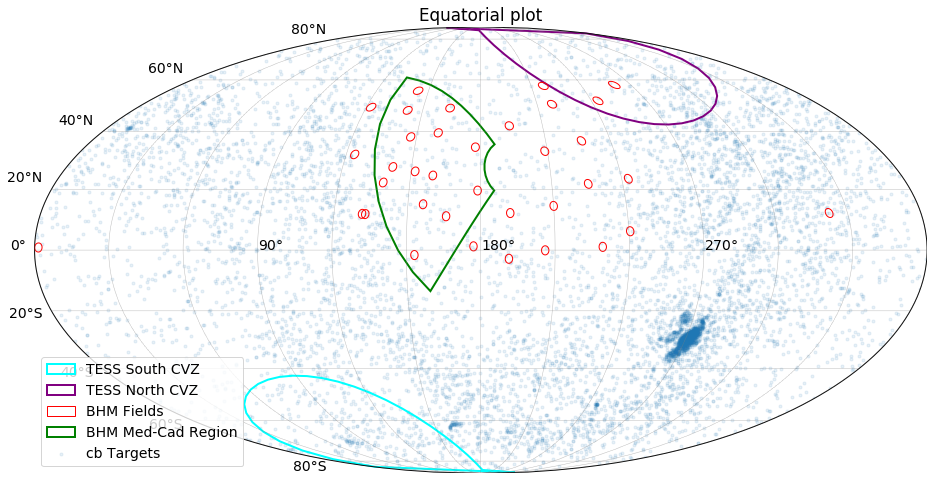

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot cb Targets
xcb,ycb = bmap(cb_tab['ra'],cb_tab['dec'])
bmap.scatter(xcb,ycb,marker='.',label='cb Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

In [5]:
target_tab['ra'] = cb_tab['ra']
target_tab['dec'] = cb_tab['dec']
target_tab['cadence'] = np.repeat('mwm_cb_3x1',len(cb_tab['ra']))
target_tab['type'] = np.repeat('mwm_cb',len(cb_tab['ra']))
target_tab['priority'] = np.repeat(np.array(15,dtype='int32'),len(cb_tab['ra']))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(cb_tab['ra']))

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str10,str6,int32,float32
2.18470833333,-1.67072222222,mwm_cb_3x1,mwm_cb,15,1.0
359.617291667,-2.75327777778,mwm_cb_3x1,mwm_cb,15,1.0
3.01879166667,2.025,mwm_cb_3x1,mwm_cb,15,1.0
356.168958333,-0.201555555556,mwm_cb_3x1,mwm_cb,15,1.0
356.007583333,0.354666666667,mwm_cb_3x1,mwm_cb,15,1.0
0.606583333333,4.12480555556,mwm_cb_3x1,mwm_cb,15,1.0
0.376875,5.10652777778,mwm_cb_3x1,mwm_cb,15,1.0
2.89045833333,4.85622222222,mwm_cb_3x1,mwm_cb,15,1.0
6.866375,-1.14077777778,mwm_cb_3x1,mwm_cb,15,1.0


In [7]:
target_tab.write('mwm_cb_target.fits',overwrite=True)

## Create Cadence Table
For this cadence the last delta is basically 1 day up to the end of the survey.

In [8]:
cadence_tab = Table()

In [9]:
cadence_tab['cadence'] = ['mwm_cb_3x1']
cadence_tab['nepochs'] = np.array([3],dtype='int32')
cadence_tab['delta'] = [np.array([0,0.125,3],dtype='float32')]
cadence_tab['delta_min'] = [np.array([0,0.083,1],dtype='float32')]
cadence_tab['delta_max'] = [np.array([0,0.15,3000],dtype='float32')]
cadence_tab['lunation'] = [np.repeat(np.array([0.35],dtype='float32'),3)]
cadence_tab['instrument'] = [np.repeat('boss',3)]

In [10]:
cadence_tab

cadence,nepochs,delta [3],delta_min [3],delta_max [3],lunation [3],instrument [3]
str10,int32,float32,float32,float32,float32,str4
mwm_cb_3x1,3,0.0 .. 3.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss


In [11]:
cadence_tab['delta'].data

array([[ 0.   ,  0.125,  3.   ]], dtype=float32)

In [12]:
cadence_tab.write('mwm_cb_cadence.fits',overwrite=True)

In [13]:
test =  Table.read('mwm_cb_cadence.fits')
test

cadence,nepochs,delta [3],delta_min [3],delta_max [3],lunation [3],instrument [3]
bytes10,int32,float32,float32,float32,float32,bytes16
mwm_cb_3x1,3,0.0 .. 3.0,0.0 .. 1.0,0.0 .. 3000.0,0.35 .. 0.35,boss .. boss
